<a href="https://colab.research.google.com/github/ngctnnnn/CS231/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.path.join(os.curdir, '/content/drive/MyDrive/credentials.json') 
!echo $GOOGLE_APPLICATION_CREDENTIALS
!cat $GOOGLE_APPLICATION_CREDENTIALS

/content/drive/MyDrive/credentials.json
{"web":{"client_id":"399670029886-cgjpn4aebjd8h049pbat01kh9ob55ntp.apps.googleusercontent.com","project_id":"lustrous-scarab-323303","auth_uri":"https://accounts.google.com/o/oauth2/auth","token_uri":"https://oauth2.googleapis.com/token","auth_provider_x509_cert_url":"https://www.googleapis.com/oauth2/v1/certs","client_secret":"PZlsNuQZSzd8ukSIugB15111","redirect_uris":["https://developers.google.com/oauthplayground"]}}

In [ ]:
#Load model
from keras.models import load_model
vgg19 = load_model('/content/drive/MyDrive/COURSES/CS231/vgg19-2.h5')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def predict_ans(prediction):
    covid, normal, pneumonia = prediction[0][0],prediction[0][1],prediction[0][2]
    # print(covid, normal, pneumonia)
    print("COVID-19 : " + str(round(covid * 100, 2)) + "%")
    print("Normal : " + str(round(normal * 100, 2)) + "%")
    print("Pneumonia : " + str(round(pneumonia * 100, 2)) +"%")

Saving covid-19-pneumonia-20-pa-on-admission.jpg to covid-19-pneumonia-20-pa-on-admission (1).jpg


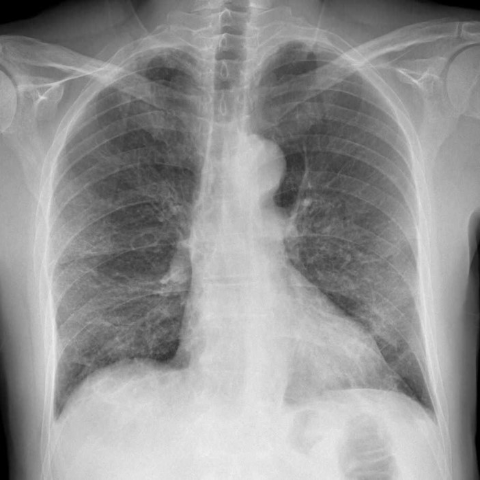

COVID-19 : 100.0%
Normal : 0.0%
Pneumonia : 0.0%


In [17]:
import json
import cv2
import cv2 as cv
from google.colab import files
from google.colab.patches import cv2_imshow

uploaded_img = files.upload()

pairs = uploaded_img.items()
for i, j in pairs:
    img_url = i
    img = cv.imread(img_url)
    #Read img
    img = cv2.resize(img,(480,480))
    cv2_imshow(img)
    img = np.reshape(img,[1,480,480,3])
    #Predict 
    prediction = vgg19.predict(img)
    predict_ans(prediction)